# Question 1

## Q1.1 generate data:
(a) $X$ uniform samples between -1 and 1, $X = -1, -0.99, \ldots, 0.99, 1$
 
(b) $Y = 2\cdot X$
 
(c) $n_1$ samples from a normal random variable with mean 0 and variance 0.01
 
$\hspace{5cm} X' = X + n_1$

(d) $n_2$ samples from a normal random variable with mean 0 and variance 0.01
 
$\hspace{5cm} Y' = y + n_2$


In [7]:
import numpy as np

x = np.arange(-1,1,0.01)
# print x

y = x*2
# print y

# The standard deviation its the square of the variation
mu, sigma = 0, 0.1
n1 = np.random.normal(mu,sigma, 200)
x_ = x + n1

mu, sigma = 0, 0.1
n2 = np.random.normal(mu,sigma, 200)
y_ = y + n2


$X'$ and $Y'$ are are positive linearly dependent because the correlation between the two random variables is $0.98271774$ which is statistically relevant. This means that when variable increase the other tends to increase as well.

In [3]:
np.corrcoef(x_,y_)[0][1]


0.98100542656260492

# Question 2


Load the data in movie_rating.csv into a dataframe. The data consists of critic ratings and people votes for a set of 20 movies.
## Q2.1
Compute the linear correlation between critic ratings and people votes

In [8]:
import pandas as pd

movie_data = pd.read_csv('movie_rating.csv', usecols=['people_vote','rating'])
# print movie_data
movie_data.corr()


,people_vote,rating
people_vote,1.000000,0.336953
rating,0.336953,1.000000


## Q2.2
(a) To explore the connection between critic ratings and people votes, draw them against each other in a scatter plot.

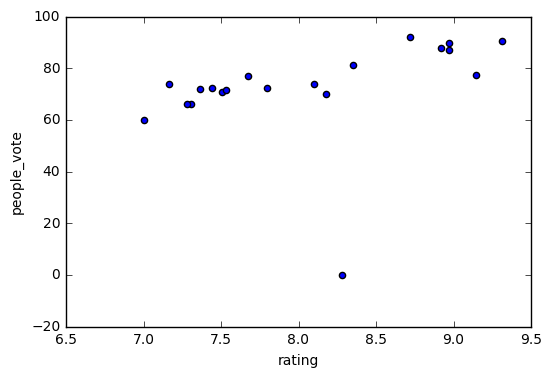

In [4]:
import matplotlib.pyplot as plt

plt.figure()
movie_data.plot(kind='scatter', x='rating', y='people_vote')
plt.show()


(b) Create a new data frame, with all the movies, except the one with the lowest people vote. Compute the linear correlation.

In [11]:
lower_people_value = min(movie_data['people_vote'])

# Condition Criteria
new_movie_data = movie_data[movie_data['people_vote'] > lower_people_value]
# print new_movie_data
new_movie_data.corr()

,people_vote,rating
people_vote,1.000000,0.860947
rating,0.860947,1.000000


(c) Draw a scatter plot for the movies selected. Is there a linear connection? 

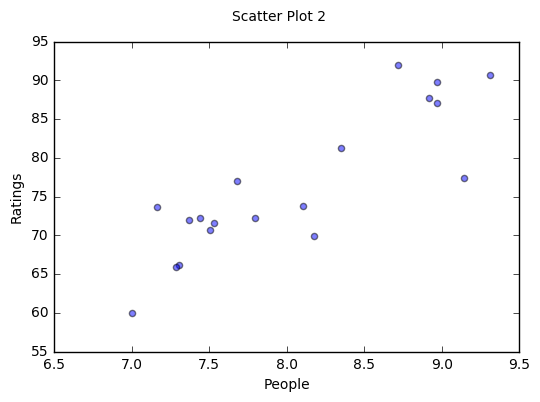

             people_vote    rating
people_vote     1.000000  0.860947
rating          0.860947  1.000000


In [62]:
new_people_array = np.array(new_movie_data['people_vote'])
new_rating_array = np.array(new_movie_data['rating'])
plt.scatter(new_rating_array, new_people_array, s=20, alpha=0.5)
plt.suptitle('Scatter Plot 2')
plt.xlabel('People')
plt.ylabel('Ratings')
plt.show()

new_movie_data.corr()

Yes, there is a linear positive correlation, which means that when one increase the other tends to increase as well. Just by eliminating the outlier, the correlation between the two random variables increased from $0.336953$ to $0.860947$.

(d) Congragulations you've encountered an outlier, a data point so far from the others, keeping it may adversely affect results. 
Linear correlation is sensitive to distance. Handling outliers is important and most cases are harder than this one, due to complexity (hunderds of variables), size (thousands of movies), etc. In this case a possible remedy would be to use order statistics or ranks (1st, 2nd,...).

$$
\small
X=\{100,0, 15, 50\}
\rightarrow
rank(X)=\{4, 1, 2, 3\}
$$

Create a new data frame for all movies with all critic ratings replaced by their rank and the same for people vote. Draw a scatter plot, and compute the linear correlation.

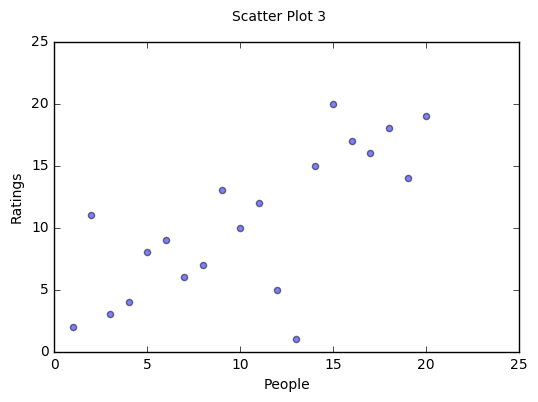

,people_vote,rating
people_vote,1.000000,0.724812
rating,0.724812,1.000000


In [77]:
movie_data_ranked = movie_data.rank()

ranked_people_array = np.array(movie_data_ranked['people_vote'])
ranked_rating_array = np.array(movie_data_ranked['rating'])
plt.scatter(ranked_rating_array, ranked_people_array, s=20, alpha=0.5)
plt.suptitle('Scatter Plot 3')
plt.xlabel('People')
plt.ylabel('Ratings')
plt.show()

movie_data_ranked.corr()

Correlation over ranks is named Spearman correlation.